<a href="https://colab.research.google.com/github/ImanLiao/COMP3029-ComputerVision/blob/main/COMP3029_Lab3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-contrib-python==4.4.0.44


#Image Classification


## Bag of features/ Bag of Visual Words Model


Mont Google Drive to Access Image
(I have uploaded the seed.zip folder to my own Google Drive) - edit the path to access your images



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/AAR

/content/drive/My Drive/AAR


Access zipped image data on Google drive

Import required libraries

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score


Define training path

In [ ]:
training_path='/content/drive/My Drive/AAR/dataset'
class_names=os.listdir(training_path)


In [ ]:
print(class_names)


['GoodSeed', 'BadSeed']


In [ ]:
image_paths=[]
image_classes=[]

Function to List all the filenames in the directory

In [ ]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [ ]:
for training_name in class_names:
    dir_=os.path.join(training_path,training_name)
    class_path=img_list(dir_)
    image_paths+=class_path

In [ ]:
len(image_paths)

44

In [ ]:
image_classes_0=[0]*(len(image_paths)//2)

In [ ]:
image_classes_1=[1]*(len(image_paths)//2)

In [ ]:
image_classes=image_classes_0+image_classes_1

Append all the image path and its corresponding labels in a list

In [ ]:
D=[]

In [ ]:
for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))

Shuffle Dataset and split into Training and Testing

In [ ]:
dataset = D
random.shuffle(dataset)
train = dataset[:15]
test = dataset[15:]

image_paths, y_train = zip(*train)
image_paths_test, y_test = zip(*test)

In [ ]:
print(image_paths_test)

('/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7392.JPG', '/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7601.JPG', '/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7491.JPG', '/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7599.JPG', '/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7506.JPG', '/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7597.JPG', '/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7498.JPG', '/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7493.JPG', '/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7385.JPG', '/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7389.JPG', '/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7387.JPG', '/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7492.JPG', '/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7594.JPG', '/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7504.JPG', '/content/drive/My Drive/AAR/dataset/Goo

In [ ]:
des_list=[]

Feature Extraction using SIFT

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import resize

In [ ]:
im = cv2.imread(image_paths[1])
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

cv2_imshow(im)

In [ ]:

y = int(im.shape[0]/3)
x = int(im.shape[1]/(10*2))
h = int(im.shape[0]/2)
w = int(im.shape[1]/10*9)


img = im[y:y+h, x:x+w]


cv2_imshow(img)


In [ ]:
# create SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()

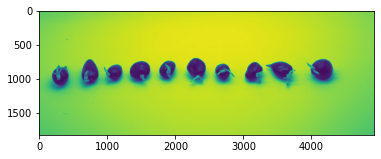

In [ ]:
plt.imshow(img)

Function for plotting keypoints

In [ ]:
keypoint, descriptor = sift.detectAndCompute(img, None)

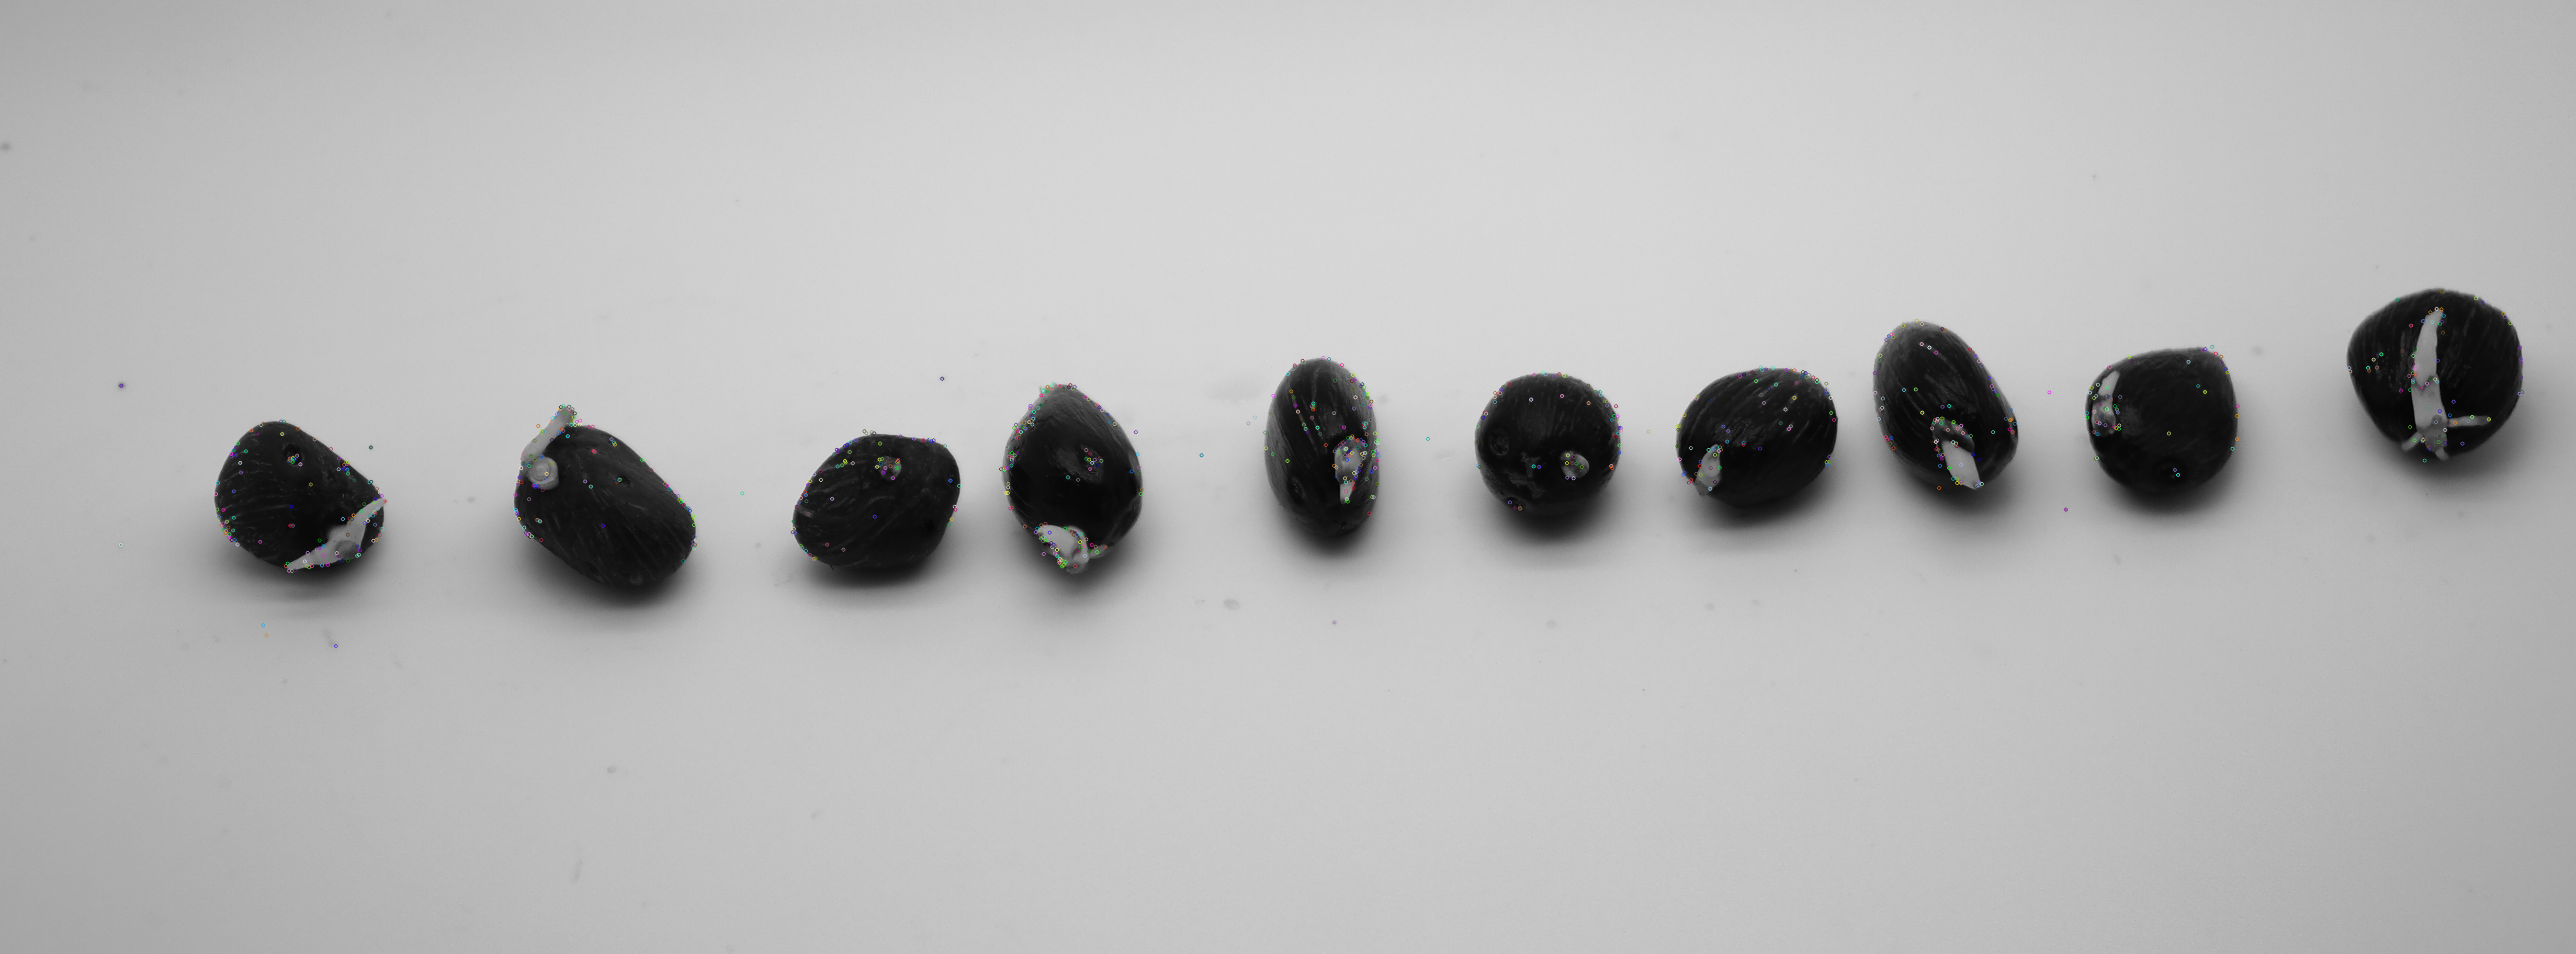

In [ ]:
sift_image = cv2.drawKeypoints(img, keypoint, im)
cv2_imshow(sift_image)

Appending descriptors of the training images in list

In [ ]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    y = int(im.shape[0]/3)
    x = int(im.shape[1]/(10*2))
    h = int(im.shape[0]/3)
    w = int(im.shape[1]/10*8)
    img = im[y:y+h, x:x+w]
    keypoint, descriptor = sift.detectAndCompute(img, None)
    des_list.append((image_pat,descriptor))

In [ ]:
print(des_list)

[('/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7500.JPG', array([[  1.,   2.,   9., ...,   4.,  14.,   7.],
       [ 37.,   3.,   0., ...,   0.,   5.,  16.],
       [ 32.,   9.,   0., ...,   0.,   1.,  18.],
       ...,
       [ 15.,   2.,   0., ...,   0.,   2.,   9.],
       [165.,  15.,   0., ...,   0.,   2.,  37.],
       [134.,  28.,   0., ...,   0.,   0.,   1.]], dtype=float32)), ('/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7595.JPG', array([[ 74.,  17.,   0., ...,   1.,   1.,   9.],
       [ 23.,   1.,   0., ...,   0.,   3.,  13.],
       [ 88.,   2.,   0., ...,   0.,   0.,   7.],
       ...,
       [ 90.,  19.,   0., ...,   0.,   0.,   2.],
       [ 90.,  15.,   1., ...,   0.,   0.,   1.],
       [108.,  11.,   0., ...,   0.,   0.,   0.]], dtype=float32)), ('/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7379.JPG', array([[169.,  23.,   0., ...,   1.,   3.,  13.],
       [ 18.,  10.,   2., ...,   1.,   0.,   1.],
       [  1.,   1.,   0., ..., 

In [ ]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [ ]:
descriptors.shape

(8726, 128)

In [ ]:
descriptors_float=descriptors.astype(float)

Performing K Means clustering on Descriptors

In [ ]:
from scipy.cluster.vq import kmeans,vq

In [ ]:
k=200
voc,variance=kmeans(descriptors_float,k,1)

Creating histogram of training image

In [ ]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

Applying standardisation on training feature

In [ ]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

## Creating Classification Model with SVM

In [ ]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=80000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Testing the Classification Model

In [ ]:
des_list_test=[]

In [ ]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)

    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    y = int(image.shape[0]/3)
    x = int(image.shape[1]/(10*2))
    h = int(image.shape[0]/3)
    w = int(image.shape[1]/10*8)
    image = image[y:y+h, x:x+w]
    keypoint_test, descriptor_test = sift.detectAndCompute(image, None)
    des_list_test.append((image_pat,descriptor_test))
    

In [ ]:
print(des_list_test)

[('/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7392.JPG', array([[16.,  0.,  0., ...,  0.,  1.,  3.],
       [28., 22.,  0., ...,  0.,  0.,  5.],
       [26., 19.,  0., ...,  0.,  0.,  7.],
       ...,
       [ 0.,  0.,  0., ..., 54., 17.,  7.],
       [32., 44., 16., ...,  0.,  0., 28.],
       [49., 17.,  1., ...,  3.,  1.,  8.]], dtype=float32)), ('/content/drive/My Drive/AAR/dataset/BadSeed/Copy of SAM_7601.JPG', array([[  0.,   1.,   4., ...,   1.,   5.,  16.],
       [  0.,   1.,   8., ...,   3.,   9.,  10.],
       [  0.,   2.,   7., ...,   1.,   0.,   6.],
       ...,
       [127.,  67.,  86., ...,   0.,   0.,   0.],
       [ 37.,  10.,   0., ...,   0.,   0.,   5.],
       [176., 102.,   0., ...,   0.,   0.,   0.]], dtype=float32)), ('/content/drive/My Drive/AAR/dataset/GoodSeed/Copy of SAM_7491.JPG', array([[ 10.,  81., 127., ...,   3.,   0.,   0.],
       [164.,  11.,   0., ...,   0.,   1.,   3.],
       [ 13.,  12.,   1., ...,   1.,   3.,  10.],
       ...,
    

In [ ]:
len(image_paths_test)

29

In [ ]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [ ]:
test_features

array([[1., 0., 3., ..., 1., 0., 2.],
       [0., 2., 0., ..., 0., 5., 0.],
       [0., 1., 2., ..., 0., 2., 1.],
       ...,
       [4., 2., 2., ..., 0., 3., 5.],
       [3., 6., 7., ..., 3., 5., 2.],
       [5., 2., 5., ..., 0., 6., 2.]], dtype=float32)

In [ ]:
test_features=stdslr.transform(test_features)

In [ ]:
print(y_test)

(0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0)


In [ ]:
true_classes=[]
for i in y_test:
    if i==1:
        true_classes.append("BadSeed")
    else:
        true_classes.append("GoodSeed")

In [ ]:
print(true_classes)

['GoodSeed', 'BadSeed', 'GoodSeed', 'BadSeed', 'BadSeed', 'BadSeed', 'BadSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'BadSeed', 'BadSeed', 'GoodSeed', 'BadSeed', 'BadSeed', 'BadSeed', 'GoodSeed', 'BadSeed', 'BadSeed', 'BadSeed', 'BadSeed', 'GoodSeed', 'BadSeed', 'GoodSeed', 'BadSeed', 'BadSeed', 'GoodSeed']


In [ ]:
predict_classes=[]
for i in clf.predict(test_features):
    if i==1:
        predict_classes.append("BadSeed")
    else:
        predict_classes.append("GoodSeed")

In [ ]:
print(predict_classes)

['GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed', 'GoodSeed']


In [ ]:
clf.predict(test_features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])